# Solution

In [104]:
# put all python import statements here
from solvers import solver
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

## Implementation

[*Write code to be able to run three methods you have chosen for arbitrary initial conditions ($x(t=0), y(t=0)$), time step ($\mathrm{d}t$), model parameters ($\alpha, \beta, \gamma, \delta$) and functions $f$ and $g$. [50 words]*]

## Preliminaries  
### Test Case 1 : 
Using the following parameters $$ \alpha = \beta = \gamma = \delta = 1 $$ and the following function $$ f(t) = -\sin(t) - (\cos(t))^2 - \cos(t) $$ and $$ g(t) = \sin(t) + (\cos(t))^2 - \cos(t) $$ with the initial conditions of $$ x = 2 , y = 0 $$ . It has the following exact solution $$ x(t) = 1 + \cos(t) $$ and $$ y(t) = 1 - \cos(t) $$.

In [105]:
""" Define the function of the rhs of the ODE for test case 1 """
def rhs_prey_predator_c1(t,y):
   x,y = y 
   # Define the function of rhs f(x) and g(x)
   ft = -np.sin(t) - (np.cos(t))**2 - np.cos(t)
   gt = np.sin(t) + (np.cos(t))**2 - np.cos(t)
   alpha = 1
   beta = 1
   gamma = delta = 1 
   dxdt = alpha * x - beta * x * y + ft
   dydt = gamma * x * y - delta * y + gt
   return np.array([dxdt,dydt])

In [106]:
''' Defining the main function time parameters and initial conditions of test case 2'''
t0 = 0 
T = 10
dt = 0.01
initial_condition = np.array([2,0])

In [107]:
''' Get the exact solution of test case 1'''
t_exact = np.linspace(t0, T, 1000)
x_exact = 1 + np.cos(t_exact)
y_exact = 1 - np.cos(t_exact)

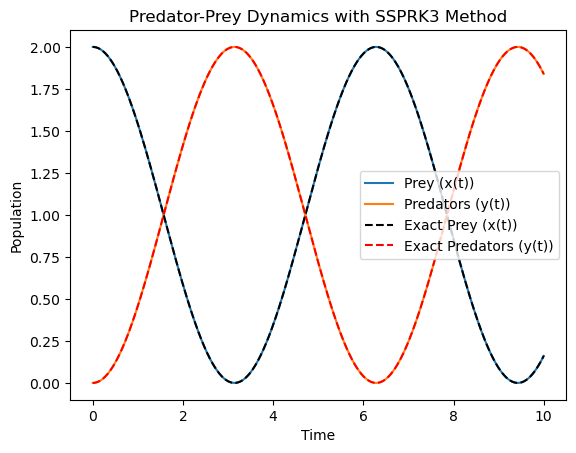

In [108]:
''' Create the solver object and solve the ODE and plot it'''
# Integrate the system using SSPRK3 method
t_values, population_values = solver(rhs_prey_predator_c1, initial_condition, t0, dt, T, "SSPRK3")

# Extracting prey and predator populations
prey_population = [pop[0] for pop in population_values]
predator_population = [pop[1] for pop in population_values]

# Plot the populations over time
plt.plot(t_values, prey_population, label='Prey (x(t))')
plt.plot(t_values, predator_population, label='Predators (y(t))')

# Plot the exact solutions
plt.plot(t_exact, x_exact, 'k--', label='Exact Prey (x(t))')
plt.plot(t_exact, y_exact, 'r--', label='Exact Predators (y(t))')

# Add labels and title to plot
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Predator-Prey Dynamics with SSPRK3 Method')
plt.show()

## Results

[*Simulate and show results for each of the test cases suggested by your boss for a range of time steps until a final time $T$.
For test case A, you should use $T = 2.5\pi$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
For test case B, you should use $T = 30$ and (at least) $\mathrm{d}t = T/100, T/200, T/400, T/800, T/1600$.
You should demonstrate how solutions look for each method, and the accuracy and efficiency of each approach. [50 words]*]



## Analysis

[*Comment on the efficiency and accuracy of each approach. [250 words]*]

## Conclusion

[*Compare the methods that you have results for, and any other relevant methods from the module, and make a recommendation of which method you think is best. [300 words]*]